In [2]:
import numpy as np
from scipy.optimize import least_squares as ls

from __future__ import print_function
from fenics import *
from dolfin import *
if not has_linear_algebra_backend("PETSc"):
    print ("DOLFIN has not been configured with PETSc. Exiting.")
    exit()

if not has_slepc():
    print ("DOLFIN has not been configured with SLEPc. Exiting.")
    exit()

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import cg

In [3]:
"""
Francois Madiot
13/07/2021

FEniCS resolution of the Takeda benchmark Model 1 Case 1
"""

from __future__ import print_function
from fenics import *
from dolfin import *
if not has_linear_algebra_backend("PETSc"):
    print ("DOLFIN has not been configured with PETSc. Exiting.")
    exit()

if not has_slepc():
    print ("DOLFIN has not been configured with SLEPc. Exiting.")
    exit()

import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import scipy.sparse as sp
from scipy.sparse.linalg import eigs
from scipy.sparse import csc_matrix
from scipy.sparse.linalg import spsolve
from scipy.sparse.linalg import cg



class x1(UserExpression):
  def eval(self, value, x):
    value[0] = x[0]

  def value_shape(self):
    return (1,)
class x2(UserExpression):
  def eval(self, value, x):
    value[0] = x[1]

  def value_shape(self):
    return (1,)
class x3(UserExpression):
  def eval(self, value, x):
    value[0] = x[2]

  def value_shape(self):
    return (1,)


class D1_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = 1.0/(3.*2.23775E-01*self.coef)
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 1.0/(3.*1.28407E-02*self.coef)
    else:
      value[0] = 1.0/(3.*2.50367E-01*self.coef)
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class D1_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = 1.0/(3.*2.23775E-01*self.coef)
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 1.0/(3.*1.28407E-02*self.coef)
    else:
      value[0] = 1.0/(3.*2.50367E-01*self.coef)
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class D2_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = 1.0/(3.*1.03864*self.coef)
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 1.0/(3.*1.20676E-02*self.coef)
    else:
      value[0] = 1.0/(3.*1.64482*self.coef)
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class D2_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = 1.0/(3.*1.03864*self.coef)
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 1.0/(3.*1.20676E-02*self.coef)
    else:
      value[0] = 1.0/(3.*1.64482*self.coef)
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)

class Sigmar11_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = (2.23775E-01-1.92423E-01)*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = (1.28407E-02-1.27700E-02)*self.coef
    else:
      value[0] = (2.50367E-01-1.93446E-01)*self.coef
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)


class Sigmar12_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = -2.28253E-02*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = -2.40997E-05*self.coef
    else:
      value[0] =-5.65042E-02 *self.coef
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class Sigmar21_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = 0.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_tol(self,tol):
    self.tol = tol
  def set_coef(self,coef):
    self.coef=coef
  def value_shape(self):
    return (1,)

class Sigmar22_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = (1.03864-8.80439E-01)*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = (1.20676E-02-1.07387E-02)*self.coef
    else:
      value[0] = (1.64482-1.62452)*self.coef

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class NuSigf1_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = 9.09319E-03*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class NuSigf2_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol and x[2]>=-self.tol and x[2] <= 15.+self.tol) :
      value[0] = 2.90183E-01
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class chi1_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0. and x[0] <= 15. and x[1]>=0. and x[1] <= 15. and x[2]>=0. and x[2] <= 15.) :
      value[0] = 1.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class chi2_TakedaModel1(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0. and x[0] <= 15. and x[1]>=0. and x[1] <= 15. and x[2]>=0. and x[2] <= 15.) :
      value[0] = 0.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class Sigmar11_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = (2.23775E-01-1.92423E-01)*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = (1.28407E-02-1.27700E-02)*self.coef
    else:
      value[0] = (2.50367E-01-1.93446E-01)*self.coef
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)


class Sigmar12_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = -2.28253E-02*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = -2.40997E-05*self.coef
    else:
      value[0] =-5.65042E-02 *self.coef
  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class Sigmar21_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = 0.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_tol(self,tol):
    self.tol = tol
  def set_coef(self,coef):
    self.coef=coef
  def value_shape(self):
    return (1,)

class Sigmar22_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = (1.03864-8.80439E-01)*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = (1.20676E-02-1.07387E-02)*self.coef
    else:
      value[0] = (1.64482-1.62452)*self.coef

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class NuSigf1_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol ) :
      value[0] = 9.09319E-03*self.coef
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class NuSigf2_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0.-self.tol and x[0] <= 15.+self.tol and x[1]>=-self.tol and x[1] <= 15.+self.tol) :
      value[0] = 2.90183E-01
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0

  def set_coef(self,coef):
    self.coef=coef
  def set_tol(self,tol):
    self.tol = tol
  def value_shape(self):
    return (1,)

class chi1_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0. and x[0] <= 15. and x[1]>=0. and x[1] <= 15.) :
      value[0] = 1.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)
class chi2_TakedaModel1_2D(UserExpression):
  def eval(self, value, x):
    if (x[0] >= 0. and x[0] <= 15. and x[1]>=0. and x[1] <= 15. ) :
      value[0] = 0.0
    elif (x[0] >= 15.-self.tol and x[0] <= 20.+self.tol and x[1]>=0.-self.tol and x[1] <= 5.+self.tol) :
      value[0] = 0.0
    else:
      value[0] = 0.0
  def set_tol(self,tol):
    self.tol = tol

  def value_shape(self):
    return (1,)

class BoundaryX0(SubDomain):
    tol = 1E-14
    def inside(self, x, on_boundary):
        tol=1E-14
        b= (on_boundary and near(x[0], 25., tol))
        b= b or (on_boundary and near(x[1], 25., tol))
        b= b or (on_boundary and near(x[2], 25., tol))
        return b
class BoundaryX0_2D(SubDomain):
    tol = 1E-14
    def inside(self, x, on_boundary):
        tol=1E-14
        b= (on_boundary and near(x[0], 25., tol))
        b= b or (on_boundary and near(x[1], 25., tol))
        #b= b or (on_boundary and near(x[2], 25., tol))
        return b

def create_indexes(Nx, Ny, Nz):
    # Create mesh and define function space
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
    V = FunctionSpace(mesh, 'DG', 0)
    dofmap = V.dofmap()
    # for cell in cells(mesh):
    #     verts = dofmap.tabulate_coordinates(cell)
    #     dofs = dofmap.cell_dofs(cell.index())
    #     for j in range(3):
    #         print ("Does vertex ", verts[j], " correspond to DOF ", dofs[j])
    # Get cell 0 as an example
    c0 = Cell(mesh, 0)
    midpoint = c0.midpoint() # modpoint of cell 0
    print(midpoint.x())
    h = 1. / 10. # uniform mesh size

    # Find translated cell c1 located 3*h to the right of c0
    translated_point = Point(midpoint.x() + 3*h, midpoint.y())
    tree = mesh.bounding_box_tree()
    c1 = tree.compute_first_entity_collision(translated_point)
    c1 = Cell(mesh, c1)

    # Now these dofs of c0:
    print( dofmap.cell_dofs(c0.index()))

    # are located exactly 3*h to the left of these
    print (dofmap.cell_dofs(c1.index()))
    # dofs_to_vertex_map = dof_to_vertex_map(V)
    # vertices_to_dof_map  = vertex_to_dof_map(V)

    # coords = mesh.coordinates()
    # np.save("coords",coords)

    # u = Function(V)
    # x = u.vector()
    # dofs_at_vertices = x[dofs_to_vertex_map]

def create_pointSet(Nx, Ny, Nz, degree=1):
    # Create mesh and define function space
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
    V = FunctionSpace(mesh, 'CG', degree)
    dofs_to_vertex_map = dof_to_vertex_map(V)
    vertices_to_dof_map  = vertex_to_dof_map(V)

    coords = mesh.coordinates()
    np.save("coords",coords)

    u = Function(V)
    x = u.vector()
    dofs_at_vertices = x[dofs_to_vertex_map]

#    # let's iterate over vertices
#    for v in vertices(mesh):
#        print ('vertex index', v.index())
##        print ('at point', v.point())
#        print ('at coordinates', coords[v.index()])
    # let's iterate over dofs
    for i in range(V.dim()):
        vertex_index = vertices_to_dof_map[i]
        print ('vertex index', vertex_index)
        #print ('at point', Vertex(mesh, vertex_index).point().str())
        print ('at coordinates', coords[vertex_index])
        print ('dof', i)



def loadAP3Result(filename,Nx, Ny, Nz, degree=1):
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
    V = FunctionSpace(mesh, 'CG', degree)
    dofs_to_vertex_map = dof_to_vertex_map(V)
    vertices_to_dof_map  = vertex_to_dof_map(V)
    u = Function(V)
    x = u.vector()
    print("dofs_to_vertex_map",dofs_to_vertex_map)
    dofs_at_vertices = x[dofs_to_vertex_map]
    print ("dofs_at_vertices",dofs_at_vertices)
    vec=np.load(filename)
    coords = mesh.coordinates()
    print("V.dim()",V.dim())
    vertices_count=0
    for v in vertices(mesh):
        vertices_count+=1
    print("vertices_count",vertices_count)
#        print ('vertex index', v.index(),dofs_at_vertices[v.index()],coords[v.index()][2])
#        x[dofs_to_vertex_map[v.index()]] = coords[v.index()][2]
    x[0]=10000.
    for i in range(V.dim()):
#        print("i dof",i)
        vertex_index = dofs_to_vertex_map[i]
#        print ('vertex index', vertex_index)
#        print 'at point', Vertex(mesh, vertex_index).point().str()
#        print ('at coordinates', coords[vertex_index])
        x[i]=vec[vertex_index]
#        print ('dof', x[i])

    # Save solution to file in VTK format
    vtkfile = File('takeda_model1_case_1/test.pvd')
    vtkfile << u

def solverTakedaModel1(Nx, Ny, Nz, degree=1,mu=[1.]*5):
    """
    Solve  takeda benchmark with finite
    elements of specified degree
    """

    # Create mesh and define function space
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
    V = FunctionSpace(mesh, 'CG', degree)

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    # Define variational problem
    tol=1E-13
    chi1_TakedaModel1_func=chi1_TakedaModel1(degree=0)
    chi1_TakedaModel1_func.set_tol(tol)
    chi2_TakedaModel1_func=chi2_TakedaModel1(degree=0)
    chi2_TakedaModel1_func.set_tol(tol)
    D1_TakedaModel1_func=D1_TakedaModel1(degree=0)
    D1_TakedaModel1_func.set_coef(mu[0])
    D1_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func=D2_TakedaModel1(degree=0)
    D2_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func.set_coef(mu[1])
    NuSigf1_TakedaModel1_func=NuSigf1_TakedaModel1(degree=0)
    NuSigf1_TakedaModel1_func.set_coef(mu[2])
    NuSigf1_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func=NuSigf2_TakedaModel1(degree=0)
    NuSigf2_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func.set_coef(mu[3])
    Sigmar11_TakedaModel1_func=Sigmar11_TakedaModel1(degree=0)
    Sigmar11_TakedaModel1_func.set_coef(mu[0])
    Sigmar11_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func=Sigmar12_TakedaModel1(degree=0)
    Sigmar12_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func.set_coef(mu[4])
    Sigmar21_TakedaModel1_func=Sigmar21_TakedaModel1(degree=0)
#    Sigmar21_TakedaModel1_func.set_coef(mu[5])
    Sigmar21_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func=Sigmar22_TakedaModel1(degree=0)
    Sigmar22_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func.set_coef(mu[1])
# Boundary conditions
    boundary_markers = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 1)
    bx0 = BoundaryX0()
    bx0.mark(boundary_markers, 0)
    ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)
    
    n    = FacetNormal(mesh) 
    h    = CellDiameter(mesh)
    havg = (h('-')+h('+'))/2.0

    u = TrialFunction(V)
    v = TestFunction(V)
    a = (D1_TakedaModel1_func[0]*dot(grad(u), grad(v)) + Sigmar11_TakedaModel1_func[0]*u*v)*dx + 0.5 *u*v*ds(0)
    a12 = Sigmar21_TakedaModel1_func[0]*u*v*dx
    a21 = Sigmar12_TakedaModel1_func[0]*u*v*dx
    a22= (D2_TakedaModel1_func[0]*dot(grad(u), grad(v)) + Sigmar22_TakedaModel1_func[0]*u*v)*dx+ 0.5 *u*v*ds(0)
    b11=  chi1_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b12=  chi1_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    b21=  chi2_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b22=  chi2_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    bid=  u*v*dx
    
    # Compute solution
    u = Function(V)
#    solve(a == L, u, bc)
#    A=assemble(a)
    A = PETScMatrix()
    A12 = PETScMatrix()
    A21 = PETScMatrix()
    A22 = PETScMatrix()
    B11 = PETScMatrix()
    B12 = PETScMatrix()
    B21 = PETScMatrix()
    B22 = PETScMatrix()
    Bid = PETScMatrix()
    assemble(a, tensor=A)
    assemble(a12, tensor=A12)
    assemble(a21, tensor=A21)
    assemble(a22, tensor=A22)
    assemble(b11, tensor=B11)
    assemble(b12, tensor=B12)
    assemble(b21, tensor=B21)
    assemble(b22, tensor=B22)
    assemble(bid, tensor=Bid)

#    mat=sp.bmat([ [ csc_matrix(A.array()), csc_matrix(A12.array())] , [csc_matrix( A21.array()), csc_matrix(A22.array())] ],format = 'csc')
    matB=sp.bmat([ [ csc_matrix(B11.array()), csc_matrix(B12.array())] , [csc_matrix( B21.array()), csc_matrix(B22.array())] ],format = 'csc')
    matId=sp.bmat([ [ csc_matrix(Bid.array()), csc_matrix(0.*B12.array())] , [csc_matrix( 0.*B21.array()), csc_matrix(Bid.array())] ],format = 'csc')

    matA11= csc_matrix(A.array())
    matA22= csc_matrix(A22.array())
    matA21= csc_matrix(A21.array())

    Nite=50
    size=len(A.array())
    eigv=np.ones(2*size)
    svv1=np.zeros(size)
    svv2=np.zeros(size)
    res1=np.zeros(size)
    res2=np.zeros(size)
#    res=np.zeros(2*size)
    print("eigv",eigv.shape)
    print("matB",matB.shape)
    vp=1
    normRes=0.1
    ite=0
    while(abs(vp-normRes)/abs(vp)>1E-5 and ite<Nite):
        norm=LA.norm(eigv)
        vp=normRes
#        print ("norm",norm)
        svv=matB.dot(eigv)
#        svv=matId.dot(eigv)
        for i in range(size):
           svv1[i]=svv[i]
           svv2[i]=svv[size+i]
        eigv1,info=cg(matA11,svv1)
#        print(matA21.shape)
#        print(eigv1.shape)
#        print(matA21.dot(eigv1).shape)
#        print(svv2.shape)
        svv2=svv2-matA21.dot(eigv1)
        eigv2,info=cg(matA22,svv2)
#        res=spsolve(mat,svv)
#        for i in range(size):
#           res1[i]=res[i]
#           res2[i]=res[size+i]
#        print ("err1",LA.norm(res1-eigv1))
#        print ("err2",LA.norm(res2-eigv2))
        for i in range(size):
           eigv[i]=eigv1[i]
           eigv[size+i]=eigv2[i]
        normRes=LA.norm(eigv)
        print ("vp",normRes)
        eigv=1./normRes*eigv
        ite+=1
        print("err",abs(vp-normRes)/abs(vp))
    ut = Function(V)
#    print("size",size)
    for i in range(size):
        ut.vector()[i] = eigv[i].real

    # Save solution to file in VTK format
    vtkfile = File('takeda_model1_case_1/solution_CG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_1.pvd')
    vtkfile << ut
    for i in range(size):
        ut.vector()[i] = eigv[size+i].real
    # Save solution to file in VTK format
    vtkfile = File('takeda_model1_case_1/solution_CG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_2.pvd')
    vtkfile << ut

#    ftest = Expression("1.",element=V.ufl_element())
#    u=interpolate(ftest,V)
#    rs=u.vector()[:]
#    u.vector()[:]=spsolve(csc_matrix(Bid.array()),B11.array().dot(rs))
#    # Save solution to file in VTK format
#    vtkfile = File('takeda_model1_case_1/chi1nusigf1.pvd')
#    vtkfile << u    
    
    return ut



def solverDGTakedaModel1(Nx, Ny, Nz, degree=1,mu=[1.]*5):
    """
    Solve  takeda benchmark with finite
    elements of specified degree
    """

    # Create mesh and define function space
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
    V = FunctionSpace(mesh, 'DG', degree)
    V_cg = FunctionSpace(mesh, 'CG', degree)
    

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    # Define variational problem
    tol=1E-13
    chi1_TakedaModel1_func=chi1_TakedaModel1(degree=0)
    chi1_TakedaModel1_func.set_tol(tol)
    chi2_TakedaModel1_func=chi2_TakedaModel1(degree=0)
    chi2_TakedaModel1_func.set_tol(tol)
    D1_TakedaModel1_func=D1_TakedaModel1(degree=0)
    D1_TakedaModel1_func.set_coef(mu[0])
    D1_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func=D2_TakedaModel1(degree=0)
    D2_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func.set_coef(mu[1])
    NuSigf1_TakedaModel1_func=NuSigf1_TakedaModel1(degree=0)
    NuSigf1_TakedaModel1_func.set_coef(mu[2])
    NuSigf1_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func=NuSigf2_TakedaModel1(degree=0)
    NuSigf2_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func.set_coef(mu[3])
    Sigmar11_TakedaModel1_func=Sigmar11_TakedaModel1(degree=0)
    Sigmar11_TakedaModel1_func.set_coef(mu[0])
    Sigmar11_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func=Sigmar12_TakedaModel1(degree=0)
    Sigmar12_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func.set_coef(mu[4])
    Sigmar21_TakedaModel1_func=Sigmar21_TakedaModel1(degree=0)
#    Sigmar21_TakedaModel1_func.set_coef(mu[5])
    Sigmar21_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func=Sigmar22_TakedaModel1(degree=0)
    Sigmar22_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func.set_coef(mu[1])
# Boundary conditions
    boundary_markers = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 1)
    bx0 = BoundaryX0()
    bx0.mark(boundary_markers, 0)
    ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)
    

    u = TrialFunction(V)
    v = TestFunction(V)

    n    = FacetNormal(mesh) 
    h = CellDiameter(mesh)
    havg = (h('-')+h('+'))/2.0
    Cip  =  (degree+1)**2
    alpha = Constant(5000.0)


    a = (D1_TakedaModel1_func[0]*dot(grad(u),grad(v))) *dx \
         + D1_TakedaModel1_func[0]('+')*(alpha('+')/h('+'))*dot(jump(v, n), jump(u, n))*dS \
         - D1_TakedaModel1_func[0]('+')*dot(avg(grad(v)), jump(u, n))*dS \
         - D1_TakedaModel1_func[0]('+')*dot(jump(v, n), avg(grad(u)))*dS  \
         + Sigmar11_TakedaModel1_func[0]*u*v*dx + 0.5 *u*v*ds(0)
    a12 = Sigmar21_TakedaModel1_func[0]*u*v*dx
    a21 = Sigmar12_TakedaModel1_func[0]*u*v*dx
    a22= (D2_TakedaModel1_func[0]*inner(grad(u),grad(v)))*dx \
         + D2_TakedaModel1_func[0]('+')*(alpha('+')/h('+'))*dot(jump(v, n), jump(u, n))*dS \
         - D2_TakedaModel1_func[0]('+')*dot(avg(grad(v)), jump(u, n))*dS \
         - D2_TakedaModel1_func[0]('+')*dot(jump(v, n), avg(grad(u)))*dS  \
         + Sigmar22_TakedaModel1_func[0]*u*v*dx+ 0.5 *u*v*ds(0)
    b11=  chi1_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b12=  chi1_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    b21=  chi2_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b22=  chi2_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    bid=  u*v*dx
    sigf1=  NuSigf1_TakedaModel1_func[0]*u*v*dx
    sigf2=  NuSigf2_TakedaModel1_func[0]*u*v*dx
    
    # Compute solution
    u = Function(V)
#    solve(a == L, u, bc)
#    A=assemble(a)
    A = PETScMatrix()
    A12 = PETScMatrix()
    A21 = PETScMatrix()
    A22 = PETScMatrix()
    B11 = PETScMatrix()
    B12 = PETScMatrix()
    B21 = PETScMatrix()
    B22 = PETScMatrix()
    Bid = PETScMatrix()
    Sigf1 = PETScMatrix()
    Sigf2 = PETScMatrix()
    assemble(a, tensor=A)
    assemble(a12, tensor=A12)
    assemble(a21, tensor=A21)
    assemble(a22, tensor=A22)
    assemble(b11, tensor=B11)
    assemble(b12, tensor=B12)
    assemble(b21, tensor=B21)
    assemble(b22, tensor=B22)
    assemble(bid, tensor=Bid)
    assemble(sigf1, tensor=Sigf1)
    assemble(sigf2, tensor=Sigf2)

#    mat=sp.bmat([ [ csc_matrix(A.array()), csc_matrix(A12.array())] , [csc_matrix( A21.array()), csc_matrix(A22.array())] ],format = 'csc')
    matB=sp.bmat([ [ csc_matrix(B11.array()), csc_matrix(B12.array())] , [csc_matrix( B21.array()), csc_matrix(B22.array())] ],format = 'csc')
#    matId=sp.bmat([ [ csc_matrix(Bid.array()), csc_matrix(0.*B12.array())] , [csc_matrix( 0.*B21.array()), csc_matrix(Bid.array())] ],format = 'csc')

    matA11= csc_matrix(A.array())
    matA22= csc_matrix(A22.array())
    matA21= csc_matrix(A21.array())
    matSigf1 = csc_matrix(Sigf1.array())
    matSigf2 = csc_matrix(Sigf2.array())  

    Nite=100
    size=len(A.array())
    eigv=np.ones(2*size)
    svv1=np.zeros(size)
    svv2=np.zeros(size)
    res1=np.zeros(size)
    res2=np.zeros(size)
#    res=np.zeros(2*size)
    print("eigv",eigv.shape)
    print("matB",matB.shape)
    vp=1
    normRes=0.1
    ite=0
    while(abs(vp-normRes)/abs(vp)>1E-5 and ite<Nite):
        norm=LA.norm(eigv)
        vp=normRes
#        print ("norm",norm)
        svv=matB.dot(eigv)
#        svv=matId.dot(eigv)
        for i in range(size):
           svv1[i]=svv[i]
           svv2[i]=svv[size+i]
        eigv1,info=cg(matA11,svv1)
#        print(matA21.shape)
#        print(eigv1.shape)
#        print(matA21.dot(eigv1).shape)
#        print(svv2.shape)
        svv2=svv2-matA21.dot(eigv1)
        eigv2,info=cg(matA22,svv2)
#        res=spsolve(mat,svv)
#        for i in range(size):
#           res1[i]=res[i]
#           res2[i]=res[size+i]
#        print ("err1",LA.norm(res1-eigv1))
#        print ("err2",LA.norm(res2-eigv2))
        for i in range(size):
           eigv[i]=eigv1[i]
           eigv[size+i]=eigv2[i]
        normRes=LA.norm(eigv)
        print ("vp",normRes)
        eigv=1./normRes*eigv
        ite+=1
        print("err",abs(vp-normRes)/abs(vp))
    power=matSigf1.dot(eigv1)+matSigf2.dot(eigv2)
    ut_dg = Function(V)
#    print("size",size)
    for i in range(size):
        ut_dg.vector()[i] = eigv[i].real
    ut = project(ut_dg,V=V_cg)
    # Save solution to file in VTK format
    vtkfile = File('takeda_model1_case_1/solution_DG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_1.pvd')
    vtkfile << ut
    for i in range(size):
        ut_dg.vector()[i] = eigv[size+i].real
    ut = project(ut_dg,V=V_cg)
    # Save solution to file in VTK format
    vtkfile = File('takeda_model1_case_1/solution_DG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_2.pvd')
    vtkfile << ut

#    ftest = Expression("1.",element=V.ufl_element())
#    u=interpolate(ftest,V)
#    rs=u.vector()[:]
    upower_dg=Function(V)
    upower_dg.vector()[:]=spsolve(csc_matrix(Bid.array()),power)
#########################    ###########save at the end of each process to construct V -> it is u_i    
    upower = project(upower_dg,V=V_cg)
    #print("upower ",upower.vector()[:])
    vtkfile = File('takeda_model1_case_1/power_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'.pvd')
    vtkfile << upower    
#    # Save solution to file in VTK format
#    vtkfile = File('takeda_model1_case_1/chi1nusigf1.pvd')
#    vtkfile << u    
    return ut,upower
def solverDGTakedaModel1_toymodel(Nx, Ny, degree=1,mu=[1.]*5):
    """
    Solve  takeda benchmark with finite
    elements of specified degree
    """

    # Create mesh and define function space
    mesh = RectangleMesh(Point(0,0),Point(25,25),Nx,Ny)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
    V = FunctionSpace(mesh, 'DG', degree)
    V_cg = FunctionSpace(mesh, 'CG', degree)
    

    # Define boundary condition
    def boundary(x, on_boundary):
        return on_boundary

    # Define variational problem
    tol=1E-13
    chi1_TakedaModel1_func=chi1_TakedaModel1_2D(degree=0)
    chi1_TakedaModel1_func.set_tol(tol)
    chi2_TakedaModel1_func=chi2_TakedaModel1_2D(degree=0)
    chi2_TakedaModel1_func.set_tol(tol)
    D1_TakedaModel1_func=D1_TakedaModel1_2D(degree=0)
    D1_TakedaModel1_func.set_coef(mu[0])
    D1_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func=D2_TakedaModel1_2D(degree=0)
    D2_TakedaModel1_func.set_tol(tol)
    D2_TakedaModel1_func.set_coef(mu[1])
    NuSigf1_TakedaModel1_func=NuSigf1_TakedaModel1_2D(degree=0)
    NuSigf1_TakedaModel1_func.set_coef(mu[2])
    NuSigf1_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func=NuSigf2_TakedaModel1_2D(degree=0)
    NuSigf2_TakedaModel1_func.set_tol(tol)
    NuSigf2_TakedaModel1_func.set_coef(mu[3])
    Sigmar11_TakedaModel1_func=Sigmar11_TakedaModel1_2D(degree=0)
    Sigmar11_TakedaModel1_func.set_coef(mu[0])
    Sigmar11_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func=Sigmar12_TakedaModel1_2D(degree=0)
    Sigmar12_TakedaModel1_func.set_tol(tol)
    Sigmar12_TakedaModel1_func.set_coef(mu[4])
    Sigmar21_TakedaModel1_func=Sigmar21_TakedaModel1_2D(degree=0)
#    Sigmar21_TakedaModel1_func.set_coef(mu[5])
    Sigmar21_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func=Sigmar22_TakedaModel1_2D(degree=0)
    Sigmar22_TakedaModel1_func.set_tol(tol)
    Sigmar22_TakedaModel1_func.set_coef(mu[1])
# Boundary conditions
    boundary_markers = MeshFunction("size_t", mesh, mesh.topology().dim()-1, 1)
    bx0 = BoundaryX0_2D()
    bx0.mark(boundary_markers, 0)
    ds = Measure('ds', domain=mesh, subdomain_data=boundary_markers)
    

    u = TrialFunction(V)
    v = TestFunction(V)

    n    = FacetNormal(mesh) 
    h = CellDiameter(mesh)
    havg = (h('-')+h('+'))/2.0
    Cip  =  (degree+1)**2
    alpha = Constant(5000.0)


    a = (D1_TakedaModel1_func[0]*dot(grad(u),grad(v))) *dx \
         + D1_TakedaModel1_func[0]('+')*(alpha('+')/h('+'))*dot(jump(v, n), jump(u, n))*dS \
         - D1_TakedaModel1_func[0]('+')*dot(avg(grad(v)), jump(u, n))*dS \
         - D1_TakedaModel1_func[0]('+')*dot(jump(v, n), avg(grad(u)))*dS  \
         + Sigmar11_TakedaModel1_func[0]*u*v*dx + 0.5 *u*v*ds(0)
    a12 = Sigmar21_TakedaModel1_func[0]*u*v*dx
    a21 = Sigmar12_TakedaModel1_func[0]*u*v*dx
    a22= (D2_TakedaModel1_func[0]*inner(grad(u),grad(v)))*dx \
         + D2_TakedaModel1_func[0]('+')*(alpha('+')/h('+'))*dot(jump(v, n), jump(u, n))*dS \
         - D2_TakedaModel1_func[0]('+')*dot(avg(grad(v)), jump(u, n))*dS \
         - D2_TakedaModel1_func[0]('+')*dot(jump(v, n), avg(grad(u)))*dS  \
         + Sigmar22_TakedaModel1_func[0]*u*v*dx+ 0.5 *u*v*ds(0)
    b11=  chi1_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b12=  chi1_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    b21=  chi2_TakedaModel1_func[0]*NuSigf1_TakedaModel1_func[0]*u*v*dx
    b22=  chi2_TakedaModel1_func[0]*NuSigf2_TakedaModel1_func[0]*u*v*dx
    bid=  u*v*dx
    sigf1=  NuSigf1_TakedaModel1_func[0]*u*v*dx
    sigf2=  NuSigf2_TakedaModel1_func[0]*u*v*dx
    
    # Compute solution
    u = Function(V)
#    solve(a == L, u, bc)
#    A=assemble(a)
    A = PETScMatrix()
    A12 = PETScMatrix()
    A21 = PETScMatrix()
    A22 = PETScMatrix()
    B11 = PETScMatrix()
    B12 = PETScMatrix()
    B21 = PETScMatrix()
    B22 = PETScMatrix()
    Bid = PETScMatrix()
    Sigf1 = PETScMatrix()
    Sigf2 = PETScMatrix()
    assemble(a, tensor=A)
    assemble(a12, tensor=A12)
    assemble(a21, tensor=A21)
    assemble(a22, tensor=A22)
    assemble(b11, tensor=B11)
    assemble(b12, tensor=B12)
    assemble(b21, tensor=B21)
    assemble(b22, tensor=B22)
    assemble(bid, tensor=Bid)
    assemble(sigf1, tensor=Sigf1)
    assemble(sigf2, tensor=Sigf2)

#    mat=sp.bmat([ [ csc_matrix(A.array()), csc_matrix(A12.array())] , [csc_matrix( A21.array()), csc_matrix(A22.array())] ],format = 'csc')
    matB=sp.bmat([ [ csc_matrix(B11.array()), csc_matrix(B12.array())] , [csc_matrix( B21.array()), csc_matrix(B22.array())] ],format = 'csc')
#    matId=sp.bmat([ [ csc_matrix(Bid.array()), csc_matrix(0.*B12.array())] , [csc_matrix( 0.*B21.array()), csc_matrix(Bid.array())] ],format = 'csc')

    matA11= csc_matrix(A.array())
    matA22= csc_matrix(A22.array())
    matA21= csc_matrix(A21.array())
    matSigf1 = csc_matrix(Sigf1.array())
    matSigf2 = csc_matrix(Sigf2.array())  

    Nite=100
    size=len(A.array())
    eigv=np.ones(2*size)
    svv1=np.zeros(size)
    svv2=np.zeros(size)
    res1=np.zeros(size)
    res2=np.zeros(size)
#    res=np.zeros(2*size)
    print("eigv",eigv.shape)
    print("matB",matB.shape)
    vp=1
    normRes=0.1
    ite=0
    while(abs(vp-normRes)/abs(vp)>1E-5 and ite<Nite):
        norm=LA.norm(eigv)
        vp=normRes
#        print ("norm",norm)
        svv=matB.dot(eigv)
#        svv=matId.dot(eigv)
        for i in range(size):
           svv1[i]=svv[i]
           svv2[i]=svv[size+i]
        eigv1,info=cg(matA11,svv1)
#        print(matA21.shape)
#        print(eigv1.shape)
#        print(matA21.dot(eigv1).shape)
#        print(svv2.shape)
        svv2=svv2-matA21.dot(eigv1)
        eigv2,info=cg(matA22,svv2)
#        res=spsolve(mat,svv)
#        for i in range(size):
#           res1[i]=res[i]
#           res2[i]=res[size+i]
#        print ("err1",LA.norm(res1-eigv1))
#        print ("err2",LA.norm(res2-eigv2))
        for i in range(size):
           eigv[i]=eigv1[i]
           eigv[size+i]=eigv2[i]
        normRes=LA.norm(eigv)
        print ("vp",normRes)
        eigv=1./normRes*eigv
        ite+=1
        print("err",abs(vp-normRes)/abs(vp))
    power=matSigf1.dot(eigv1)+matSigf2.dot(eigv2)
    ut_dg = Function(V)
#    print("size",size)
    for i in range(size):
        ut_dg.vector()[i] = eigv[i].real
    ut = project(ut_dg,V=V_cg)
    # Save solution to file in VTK format
    vtkfile = File('toymodel/solution_DG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_1.pvd')
    vtkfile << ut
    ut1 = ut
    for i in range(size):
        ut_dg.vector()[i] = eigv[size+i].real
    ut = project(ut_dg,V=V_cg)
    # Save solution to file in VTK format
    vtkfile = File('toymodel/solution_DG_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_2.pvd')
    vtkfile << ut
    # Save solution to file in VTK format
    vtkfile = File('toymodel/solution_DG_disc_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'_group_2.pvd')
    vtkfile << ut_dg
    ut2 = ut
#    ftest = Expression("1.",element=V.ufl_element())
#    u=interpolate(ftest,V)
#    rs=u.vector()[:]
    upower_dg=Function(V)
    upower_dg.vector()[:]=spsolve(csc_matrix(Bid.array()),power)
    vtkfile = File('toymodel/power_discontinuous_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'.pvd')
    vtkfile << upower_dg    
#   #########################    ###########save at the end of each process to construct V -> it is u_i    
    upower = project(upower_dg,V=V_cg)
    #print("upower ",upower.vector()[:])
    vtkfile = File('toymodel/power_continuous_mu'+str(mu[0])+'_'+str(mu[1])+'_'+str(mu[2])+'_'+str(mu[3])+'_'+str(mu[4])+'_'+str(mu[5])+'.pvd')
    vtkfile << upower    
#    # Save solution to file in VTK format
#    vtkfile = File('takeda_model1_case_1/chi1nusigf1.pvd')
#    vtkfile << u    
    return ut1,ut2,upower_dg

def F_function_3D(Nx,Ny,Nz,ut,indexes) : 
    mesh = BoxMesh(Point(0,0,0),Point(25,25,25),Nx,Ny,Nz)
    V_P0 = FunctionSpace(mesh, 'DG', 0)
    ut_0 = project(ut,V=V_P0)
    return   [ut_0.vector()[index] for index in indexes]
def F_function_2D(Nx,Ny,ut,indexes) : 
    mesh = RectangleMesh(Point(0,0),Point(25,25),Nx,Ny)
    V_P0 = FunctionSpace(mesh, 'DG', 0)
    ut_0 = project(ut,V=V_P0)
    return   [ut_0.vector()[index] for index in indexes]

def run_solver_3D(nx, ny, nz, degree, mu):
    "Run solver to compute and post-process solution"

    print(mu)
    # Set up problem parameters and call solver

    #u = solverTakedaModel1( nx, ny, nz, degree, mu)
    ut, upower = solverDGTakedaModel1( nx, ny, nz, degree, mu)
    g = F_function_3D(nx,ny,nz,upower,range(1000))
    
    ##################Save g for different values
    print('g ='+str(g)+'\n')
    return g,upower,ut
def run_solver_2D(nx, ny, degree, mu):
    "Run solver to compute and post-process solution"

    print(mu)
    # Set up problem parameters and call solver

    #u = solverTakedaModel1( nx, ny, nz, degree, mu)
    ut1,ut2, upower = solverDGTakedaModel1_toymodel( nx, ny, degree, mu)
    gpower = F_function_2D(nx,ny,upower,range(10))
    gut1 = F_function_2D(nx,ny,ut1,range(10))
    gut2 = F_function_2D(nx,ny,ut2,range(10))
    ##################Save g for different values
    #print('g ='+str(g)+'\n')
    return gpower,gut1,gut2,upower,ut1,ut2


if __name__ == '__main__':
    nx     = 10
    ny     = 10
    nz     = 15
    degree = 1

    #create_pointSet( nx, ny, nz, degree)
    
    #loadAP3Result("power.npy",nx, ny, nz, degree)
    create_indexes(nx,ny,nz)


    gpower=[]
    gut1=[]
    gut2=[]
    upower=[]
    ut1=[]
    ut2=[]
    # for i in range(2):
    #gpower_i,gut1_i,gut2_i,upower_i,ut1_i,ut2_i = run_solver_2D(nx, ny, degree,[1.]*6)
    #   g.append(g_i)
    #   upower.append(upower_i.vector()[:])
    #   ut.append(ut_i.vector()[:])
    # np.savez('data.npz', g=g, upower=upower, ut=ut)
    # data = np.load('data.npz')
    # print("upower ",data['upower'])
    step=0.1
    values= [0.8,1.]
    np.arange(0.8,1.+0.1*step,step)
    for mu0 in values:
        for mu1 in values:
            for mu2 in values:
                for mu3 in values:
                    for mu4 in values:
                        for mu5 in values:
                            mu=[mu0,mu1,mu2,mu3,mu4,mu5]    #  0.8 < mu[i] < 1.0 
                            gpower_i,gut1_i,gut2_i,upower_i,ut1_i,ut2_i = run_solver_2D(nx, ny, degree,mu)
                            gpower.append(gpower_i)
                            gut1.append(gut1_i)
                            gut2.append(gut2_i)
                            upower.append(upower_i.vector()[:])
                            ut1.append(ut1_i.vector()[:])
                            ut2.append(ut2_i.vector()[:])
    np.savez('data2D.npz', gpower=gpower,gut1 = gut1,gut2 = gut2, upower=upower, ut1=ut1, ut2=ut2)
    
# data= np.load('data.npz')
# ut=data['ut']
# gflux = []
# # Create mesh and define function space
# mesh = BoxMesh(Point(0,0,0),Point(25,25,25),nx,ny,nz)
# #    mesh = UnitCubeMesh(Nx, Ny,Nz)
# V = FunctionSpace(mesh, 'DG', degree)
# V_cg = FunctionSpace(mesh, 'CG', degree)
# flux = Function(V_cg)
#    print("size",size)

# for i in range(64):
#   for j in range(len(ut)):
#     flux.vector()[j] = ut[i,j]
#   gflux.append(F_function(nx,ny,nz,flux,range(1000)))

# np.savez('gflux.npz', gflux=gflux)




1.875
[0]
[0]
[0.8, 0.8, 0.8, 0.8, 0.8, 0.8]
eigv (1200,)
matB (1200, 1200)
vp 103.19185770177549
err 1030.9185770177548
vp 1.2027058327135953
err 0.9883449541514272
vp 1.2007497810591006
err 0.001626375794720663
vp 1.2004469584623025
err 0.0002521945883937088
vp 1.20037471483422
err 6.018060820861785e-05
vp 1.2003533600706666
err 1.7790081121811113e-05
vp 1.20034679216461
err 5.471643830104592e-06
[0.8, 0.8, 0.8, 0.8, 0.8, 1.0]
eigv (1200,)
matB (1200, 1200)
vp 103.19185770177549
err 1030.9185770177548
vp 1.2027058327135953
err 0.9883449541514272
vp 1.2007497810591006
err 0.001626375794720663
vp 1.2004469584623025
err 0.0002521945883937088
vp 1.20037471483422
err 6.018060820861785e-05
vp 1.2003533600706666
err 1.7790081121811113e-05
vp 1.20034679216461
err 5.471643830104592e-06
[0.8, 0.8, 0.8, 0.8, 1.0, 0.8]
eigv (1200,)
matB (1200, 1200)
vp 107.57512487841667
err 1074.7512487841668
vp 1.4696558921821132
err 0.9863383296664248
vp 1.4648541541409414
err 0.0032672532847415536
vp 1.46402

KeyboardInterrupt: 

In [ ]:
data = np.load('data2D.npz')
V = data['upower']
print("upower ",(data['upower']))
mesh = RectangleMesh(Point(0,0),Point(25,25),nx,ny)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
VV = FunctionSpace(mesh, 'DG', degree)

uu = Function(VV)
#    print("size",size)
for i in range(len(V[10,:])):
    uu.vector()[i] = V[10,i]
vtkfile = File('ReferencePower.pvd')
vtkfile << uu


upower  [[0.00439881 0.00448067 0.00434911 ... 0.         0.         0.        ]
 [0.00439881 0.00448067 0.00434911 ... 0.         0.         0.        ]
 [0.00619221 0.00630589 0.0061236  ... 0.         0.         0.        ]
 ...
 [0.00324119 0.00331148 0.00319556 ... 0.         0.         0.        ]
 [0.00449865 0.00459455 0.00443671 ... 0.         0.         0.        ]
 [0.00449865 0.00459455 0.00443671 ... 0.         0.         0.        ]]


In [10]:
import scipy as scipy
import time as time
np.random.seed(0)
# data = np.load('data2D.npz')
# V = data['upower']
# V = V.T
# uRef = V[10,:]
def gd(V,F,gepsilon,u0,lamd=0,step = 0.1,maxIter =int(1e5),tol = 1e-8):
    u= u0
    objectiveValue = []
    normgrad = []

    #objectiveValue.append(np.linalg.norm(V*u-uRef))
    t = time.time()
    A = (V.T*F.T)*F*V
    B = V.T*F.T*gepsilon
    objectiveValue.append(0)
    normgrad.append(np.linalg.norm(A*u -B+lamd*u))
    Q,R = (np.linalg.qr(V))

    for i in range(maxIter):
        u = u - step*(A*u -B+lamd*Q.T*Q*u)
        # objectiveValue.append(0.5*np.linalg.norm(F*V*u-gepsilon)**2 + 0.5*lamd*np.linalg.norm(V*u)**2)
        # objectiveValue.append(np.linalg.norm(V*u-uRef))
        if i%100==0:
            difference = np.zeros((len(V[:,0]),1))
            xk = V*u
            for j in range(len(xk)):
                if np.abs(V[:,10][j])<1e-10:
                    difference[j] = np.abs(xk[j] - V[:,10][j])
                else:
                    difference[j] = np.abs(xk[j] - V[:,10][j])/V[:,10][j]
            objectiveValue.append(np.linalg.norm(difference))
        #objectiveValue.append(np.linalg.norm(time.time()-t))
        normgrad.append(np.linalg.norm(A*u -B+lamd*Q.T*Q*u))
        if i%1000==0:
            print ("grad "+str(i)+": ",np.linalg.norm(A*u -B+lamd*Q.T*Q*u))
        if np.linalg.norm(A*u -B+lamd*Q.T*Q*u) < tol:

            return u,objectiveValue
    return u,objectiveValue

def accgd(V,F,gepsilon,u0,lamd=0,step = 0.5,maxIter =int(1e5),tol = 1e-8):
    y= u0
    x=0
    objectiveValue = []
    normgrad = []
    t = time.time()
    #objectiveValue.append(0)
    A = (V.T*F.T)*F*V
    B = V.T*F.T*gepsilon
    normgrad.append(np.linalg.norm(A*y -B+lamd*y))

    for i in range(maxIter):
        x = y - step*(A*y -B+lamd*y)
        y = x + (i/(i+3))*(x-y)
        #objectiveValue.append(0.5*np.linalg.norm(F*V*x-gepsilon)**2+lamd*np.linalg.norm(V*x)**2)
        if i%100==0:
            difference = np.zeros((len(V[:,0]),1))
            xk = V*x
            for j in range(len(xk)):
                if np.abs(V[:,10][j])<1e-10:
                    difference[j] = np.abs(xk[j] - V[:,10][j])
                else:
                    difference[j] = np.abs(xk[j] - V[:,10][j])/V[:,10][j]
            objectiveValue.append(np.linalg.norm(difference))
        #objectiveValue.append(np.linalg.norm(difference))
        normgrad.append(np.linalg.norm(A*x -B+lamd*x))
        if i%1000==0:
            print ("grad "+str(i)+": ",np.linalg.norm(A*x -B+lamd*x))
        if np.linalg.norm(A*x -B+lamd*x) < tol:

            return x,objectiveValue
    return x,objectiveValue
def FISTA(V,F,gepsilon,u0,lamd=0,step = 0.5,maxIter =int(1e5),tol = 1e-8):
    y= u0
    x=0
    objectiveValue = []
    A = (V.T*F.T)*F*V
    B = V.T*F.T*gepsilon
    for i in range(maxIter):
        x = y - step*(A*y -B+lamd*V.T*V*y)
        y = x + (1/(1+i))*(x-y)
        objectiveValue.append(0.5*np.linalg.norm(F*V*x-gepsilon)**2+lamd*np.linalg.norm(V*x)**2)
        if i%100==0:
            print ("grad "+str(i)+": ",np.linalg.norm(A*x -B+lamd*V.T*V*x))
        if np.linalg.norm(A*x -B+lamd*V.T*V*x) < tol:

            return x,objectiveValue
    return x,objectiveValue

data = np.load('data2D.npz')
V = data['upower']
V = V.T
graw = data['gpower']
gepsilon = graw[10,:]
u0 = np.zeros((64,1))
#u0 = np.zeros((16,1))
I = np.eye(len(V[:,0]))
F = I[0:10,:]



V = np.matrix(V)
print(np.linalg.cond(V))
F = np.matrix(F)
gepsilon = np.matrix(gepsilon).T
noise = np.random.normal(0,(max(gepsilon)*10)**2,(len(gepsilon),1))
gepsilon += noise
alpha,objFun = gd(V,F,gepsilon,u0,lamd = 0,step = 0.5,maxIter =2*int(1e4),tol = 1e-30)
#print(alpha)
#V = np.matrix(scipy.linalg.orth(V))
#V,R = np.linalg.qr(V)
u = V*alpha
difference = np.zeros((len(V[:,0]),1))
for j in range(len(u)):
    if np.abs(V[:,10][j])<1e-10:
        difference[j] = np.abs(u[j] - V[:,10][j])
    else:
        difference[j] = np.abs(u[j] - V[:,10][j])/V[:,10][j]


mesh = RectangleMesh(Point(0,0),Point(25,25),nx,ny)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
VV = FunctionSpace(mesh, 'DG', degree)

uu = Function(VV)
#    print("size",size)
for i in range(len(u)):
    uu.vector()[i] = u[i]
vtkfile = File('ReconstructionPowerNoiseWithoutReg2.pvd')
vtkfile << uu


for i in range(len(u)):
    uu.vector()[i] = difference[i]
vtkfile = File('DifferencePowerNoiseWithoutReg2.pvd')
vtkfile << uu





1.4167153529113526e+25
grad 0:  0.0034332129613504504


KeyboardInterrupt: 

grad 0:  0.002568877948486362
grad 0:  0.0034332129613504504
grad 1000:  3.2115854586782047e-06
grad 2000:  7.55816609443296e-07
grad 3000:  7.558029490677559e-07
grad 4000:  7.557946164864317e-07
grad 5000:  7.557862840012968e-07
grad 0:  0.003415926261093162
grad 1000:  2.0566016346751657e-08
grad 2000:  3.3296650650857245e-11
grad 3000:  2.2155111478461208e-13
grad 4000:  1.4740285609789696e-15
grad 0:  0.0034242238772166605
grad 1000:  2.3304380135186225e-07
grad 2000:  4.1306016930004484e-09
grad 3000:  3.057521756048511e-10
grad 4000:  2.2632297354443107e-11
grad 5000:  1.6752812195783107e-12
grad 0:  0.0034330400943478777
grad 1000:  3.0537832069774423e-06
grad 2000:  6.838552376139044e-07
grad 3000:  6.50490660084873e-07
grad 4000:  6.187582606464991e-07
grad 5000:  5.885738391240175e-07


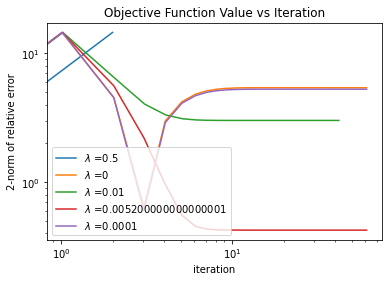

In [11]:
def bestLamda(start,end, maxIter = 10):
    for i in range(maxIter):
        lamda = start+(end-start)/2
        u,objFun1 = gd(V,F,gepsilon,u0,lamd = start,step = 0.5,maxIter =3*int(1e3),tol = 1e-20)
        u,objFun2 = gd(V,F,gepsilon,u0,lamd = end,step = 0.5,maxIter =3*int(1e3),tol = 1e-20)
        print("Lambda iteration: ",lamda)
        if np.abs(objFun1[-1])<1e-3 or (i == maxIter-1):
            print("Best Lambda: ",start)
            return lamda
        if objFun1[-1]<objFun2[-1]:
            end = lamda
        else:
            start = lamda
#bestLamda(0,1e-2)
import matplotlib.pyplot as plt
from scipy.optimize import minimize
lamd = [0.5,0,1e-2,5.2*1e-3,1e-4]

for i in range(len(lamd)):
    alpha2,objFun2 = gd(V,F,gepsilon,u0,lamd[i],step = 0.5,maxIter =6*int(1e3),tol = 1e-15)
    plt.plot(np.linspace(0,len(objFun2),len(objFun2)),objFun2,label='$\lambda$ ='+str(lamd[i]))


    # alpha2,objFun2, normgrad= accgd(V,F,gepsilon,u0,5.2*1e-3,step = 0.5,maxIter =3*int(1e3),tol = 1e-15)
    # plt.plot(objFun2,normgrad,label='$\lambda$ = 5.2*1e-3, Accelerated GD')


plt.legend()
plt.legend(loc= 'best')
plt.xlabel('iteration * 100')
plt.ylabel('2-norm of relative error')
plt.yscale('log')
plt.xscale('log')
plt.title('Objective Function Value vs Iteration')
plt.savefig('iterObj.png',dpi=300)
plt.show()



In [125]:
#Flux
fluxdata = np.load('gflux.npz')
gflux = fluxdata['gflux']
data = np.load('data.npz')
V = data['ut']
V = V.T
#print(np.shape(V))
gepsilon = gflux[0:30,10]
u0 = np.zeros((64,1))
I = np.eye(len(V[:,0]))
F = I[0:30,:]

#print(np.shape(F))


V = np.matrix(V)
alpha = np.zeros((1,64))
alpha[0,10] = 1
#u0 = V*alpha
print('max = ', max(V[:,0]))
F = np.matrix(F)
gepsilon = np.matrix(gepsilon).T
# noise = np.random.normal(0,(max(gepsilon)*0.03)**2,(len(gepsilon),1))
# gepsilon += noise
alpha = gd(V,F,gepsilon,alpha.T,lamd = 1e-3)
#print(alpha)

u = V*alpha
difference = np.abs(V[:,10]-u)
print(np.linalg.norm(difference))
mesh = BoxMesh(Point(0,0,0),Point(25,25,25),nx,ny,nz)
#    mesh = UnitCubeMesh(Nx, Ny,Nz)
VV = FunctionSpace(mesh, 'CG', degree)

uu = Function(VV)
#    print("size",size)
for i in range(len(u)):
    uu.vector()[i] = u[i]
vtkfile = File('visualisationReconstructed.pvd')
vtkfile << uu
for i in range(len(u)):
    uu.vector()[i] = V[i,10]
vtkfile = File('visualisationOriginalFlux.pvd')
vtkfile << uu

for i in range(len(u)):
    uu.vector()[i] = difference[i]
vtkfile = File('visualisationDifferenceFlux.pvd')
vtkfile << uu

print(u)



max =  [[0.01130982]]
(64, 64)
(64, 1)
grad:  0.0037718642453648307
grad:  0.0027848507768072164
grad:  0.0021036491883702625
grad:  0.001645482406637731
grad:  0.0013481344573830097
grad:  0.0011628357381506024
grad:  0.0010512404305184403
grad:  0.0009849695592577426
grad:  0.0009449508247798653
grad:  0.0009194954225998798
grad:  0.0009019120180719903
grad:  0.0008885330051052513
grad:  0.0008773983712248831
grad:  0.000867475152664989
grad:  0.0008582229007468775
grad:  0.0008493598035292364
grad:  0.0008407390347166834
grad:  0.0008322839917633268
grad:  0.000823954544217517
grad:  0.000815729489042108
grad:  0.0008075974429532548
grad:  0.0007995521178639311
grad:  0.0007915898709368612
grad:  0.0007837084343793098
grad:  0.000775906256938721
grad:  0.0007681821625188473
grad:  0.0007605351731856876
grad:  0.0007529644173868322
grad:  0.000745469082341392
grad:  0.0007380483893257613
grad:  0.0007307015808275445
grad:  0.0007234279138515549
grad:  0.0007162266564150007
grad:  0.0